In [37]:
# set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read in data
housing = pd.read_csv('data/homeprices.applied.econ.csv')

In [7]:
# explore
housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


Our data looks pretty clean, and the records have plain, intuitive values. 

Let's ask our first question: do homes with air conditioning have a higher sales price than homes without ac?

We'll start by splitting the data on our feature of interest, 'airco'.

In [ ]:
# split the data
ac_yes = housing[(housing['airco'] == 'yes')]
ac_yes.info()

ac_no = housing[(housing['airco'] == 'no')]
ac_no.info()

Let's make a plot to visually inspect for normality. 

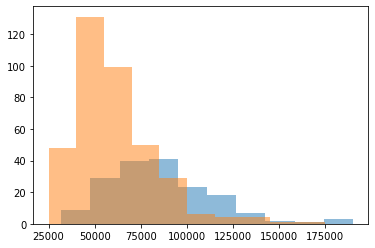

In [17]:
# check for normality
plt.hist(ac_yes['price'], alpha = .5) # blue
plt.hist(ac_no['price'], alpha = .5) # orange
plt.show()

Both look normal...ish. Don't fallback on the numbers, stand by them. Check if skewness and kurtosis are within acceptable ranges to run a test requiring normallly distributed samples. 

Kurtosis and skewness should both be between +/-3

In [14]:
# looks, normalish. let's check skewness and kurtosis
# want skewness +/-3, kurtosis +/- 3
print(stats.describe(ac_yes['price']))
print(stats.describe(ac_no['price']))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


Houses with ac have acceptable skewness and kurtosis, while houses w/out ac have a kurtosis that disqualifies it from t-testing. These two distirbutions may be independent, but they are not acceptably normal. An independent samples t-test won't help us here.

Best to spend time doing good analysis and move on to our next question. 

Do homes with a full basement have a higher saleprice than homes without a full basement?

Let's follow the same procedure and split our data.

In [ ]:
# split data
full_yes = housing[(housing['fullbase'] == 'yes')]
full_yes.info()
full_no = housing[(housing['fullbase'] == 'no')]
full_no.info()


Check for normality before performing the test.

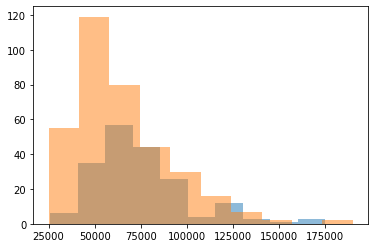

In [42]:
plt.hist(full_yes['price'], alpha =0.5)
plt.hist(full_no['price'], alpha =0.5)
plt.show()

Again, looks can be deceiving. Let's be sure by checking the numbers.

In [44]:
# these distributions already look ab-normal. let's see.
print(stats.describe(full_yes['price']))
print(stats.describe(full_no['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


Both samples are acceptably normal and can stand up to analysis. 

Perform an independent samples t-test.

In [34]:
# these distributions are acceptably normal. 
# Stats time. t-test engage.
stats.ttest_ind(full_yes['price'], full_no['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

From the test statistic and p-value, there appears to be a signifcant 
difference in the mean price of houses with a full basement and houses with
out one. 

There is less than 0.001% chance of observing a difference as large as what the experiment found in the population, even if the null is true. 

Let's see an effect size (?) from the confidence interval

In [45]:
# define a function to return the condicence interval
# politely ripped off from the notes
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(full_yes['price'], full_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

[[Text(0, 0, 'full_base_yes'), Text(0, 0, 'full_base_no')]]

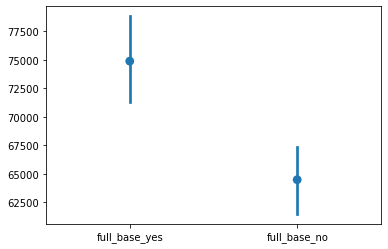

In [39]:
price = sns.pointplot(data=[full_yes['price'],
                            full_no['price']], join=False)
price.set(xticklabels = ['full_base_yes', 'full_base_no'])

With 95% condifence, houses with a full basement sell for between 1,5032.29 and 5,801.54 dollars on average more than houses without a full basement. Considering that homes will sell in the 10's of thousands of dollars, a full basement may not affect price enough to be a budget-making feature. 

This difference could be important information to someone shopping for houses. If a full basement is a feature can make a concession on to stay within budget, they can get a similar house without a full basement, they can expect to be paying somwhere in our CI less on average. Should they want a full basement, they can expect this feature to add somehwere in this range on average. 